# Project 4: Regression Analysis and Define Your Own Task

## Part 1

In [41]:
import pandas as pd

dataset_1 = pd.read_csv("diamonds_ece219.csv")

In [42]:
dataset_1.head()

,Unnamed: 0,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200


In [43]:
dataset_1 = dataset_1.drop(columns = ['Unnamed: 0'])

In [44]:
dataset_1.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200


In [45]:
# Numerical Encodings for Categorical data

color_dict = {'M': 1, # Bad Color
              'L': 2, 
              'K': 3,
              'J': 4,
              'I': 5,
              'H': 6,
              'G': 7,
              'F': 8,
              'E': 9,
              'D': 10} # Good Color
              
clarity_dict = {'I1': 1, # Bad Clarity
                'I2': 2,
                'I3': 3,
                'SI2': 4,
                'SI1': 5,
                'VS2': 6,
                'VS1': 7,
                'VVS2': 8,
                'VVS1': 9,
                'IF': 10,
                'FL': 11} # Good Clarity

cut_dict = {'Poor': 1, 
            'Fair': 2, 
            'Good': 3,
            'Very Good': 4,
            'Excellent': 5}

symmetry_dict = {'Poor': 1, 
            'Fair': 2, 
            'Good': 3,
            'Very Good': 4,
            'Excellent': 5}

polish_dict = {'Poor': 1, 
            'Fair': 2, 
            'Good': 3,
            'Very Good': 4,
            'Excellent': 5}

In [46]:
# Copy dataset to make changes/encode
diamond_dataset = dataset_1.copy(deep = True)

# Apply encoding with map()
diamond_dataset['color_encoded'] = diamond_dataset['color'].map(color_dict)
diamond_dataset['clarity_encoded'] = diamond_dataset['clarity'].map(clarity_dict)
diamond_dataset['cut_encoded'] = diamond_dataset['cut'].map(cut_dict)
diamond_dataset['symmetry_encoded'] = diamond_dataset['symmetry'].map(symmetry_dict)
diamond_dataset['polish_encoded'] = diamond_dataset['polish'].map(polish_dict)

In [47]:
# Verify encoding
diamond_dataset.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price,color_encoded,clarity_encoded,cut_encoded,symmetry_encoded,polish_encoded
0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200,9,8,5,4,4
1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200,9,8,4,4,4
2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200,9,8,5,4,4
3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200,9,8,5,4,4
4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200,9,8,4,4,5


In [48]:
# Drop original non-encoded columns
diamond_dataset = diamond_dataset.drop(columns = ['color', 'clarity', 'cut', 'symmetry', 'polish', 'girdle_min', 'girdle_max'])

In [49]:
# Verify dropped columns
diamond_dataset.head()

,carat,depth_percent,table_percent,length,width,depth,price,color_encoded,clarity_encoded,cut_encoded,symmetry_encoded,polish_encoded
0,0.09,62.7,59.0,2.85,2.87,1.79,200,9,8,5,4,4
1,0.09,61.9,59.0,2.84,2.89,1.78,200,9,8,4,4,4
2,0.09,61.1,59.0,2.88,2.90,1.77,200,9,8,5,4,4
3,0.09,62.0,59.0,2.86,2.88,1.78,200,9,8,5,4,4
4,0.09,64.9,58.5,2.79,2.83,1.82,200,9,8,4,4,5


### Question 1.1

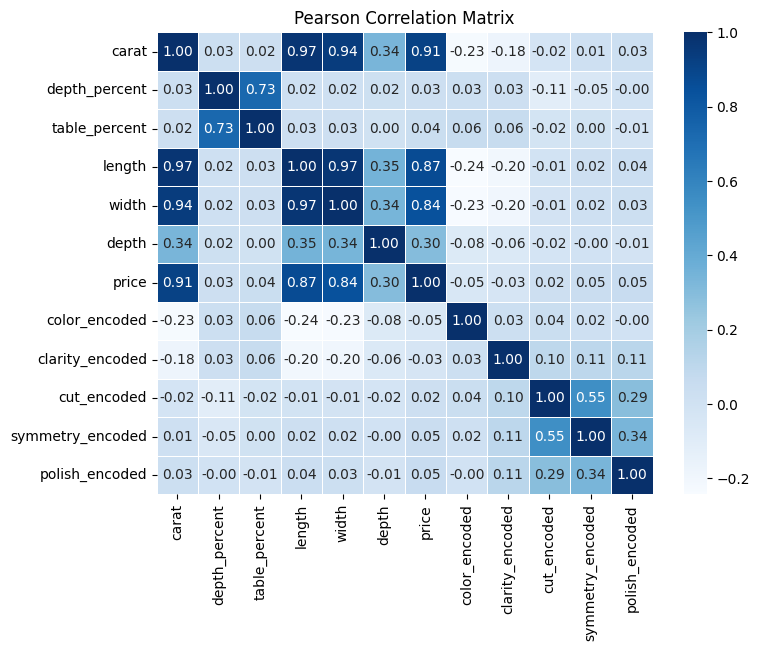

Features with highest absolute correlation with the target variable (price):
carat               0.913479
length              0.869521
width               0.841887
depth               0.299696
polish_encoded      0.054928
color_encoded       0.047189
symmetry_encoded    0.047149
table_percent       0.042453
clarity_encoded     0.029951
depth_percent       0.025469
cut_encoded         0.024356
Name: price, dtype: float64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Pearson correlation matrix
correlation_matrix = diamond_dataset.corr()

# Plot heatmap of Pearson correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'Blues', fmt = ".2f", linewidths = 0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

# Find features with highest absolute correlation with the target variable (price)
target_correlation = correlation_matrix['price'].abs().sort_values(ascending = False)
print("Features with highest absolute correlation with the target variable (price):")
print(target_correlation[1:])  

### Question 1.2

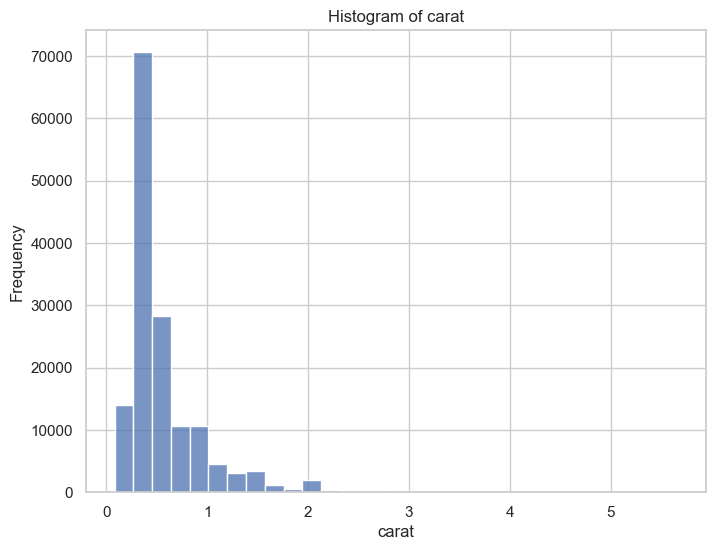

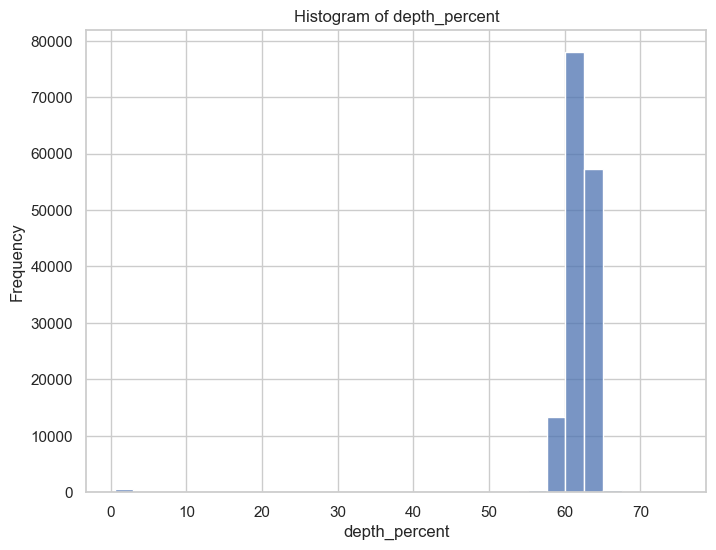

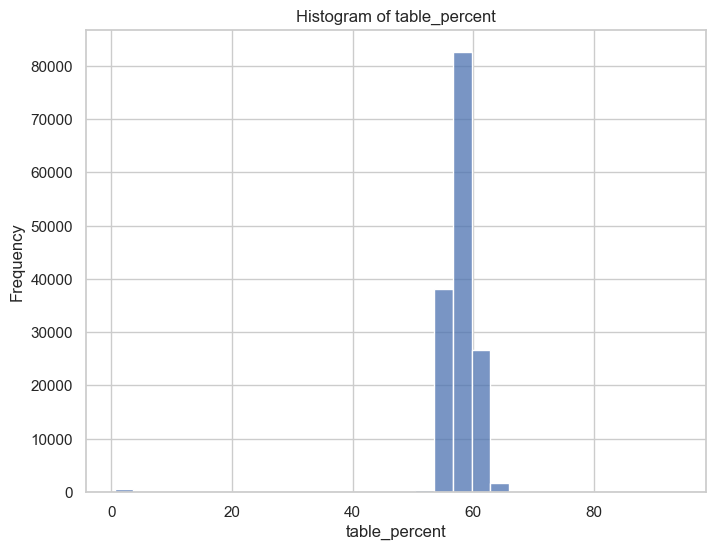

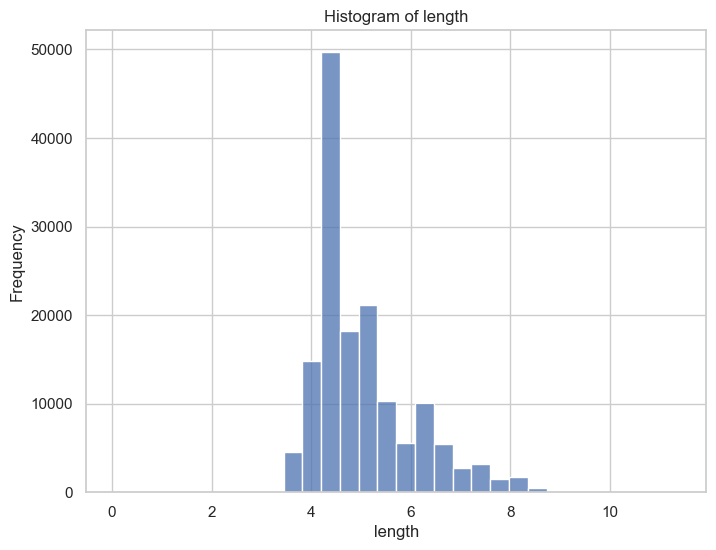

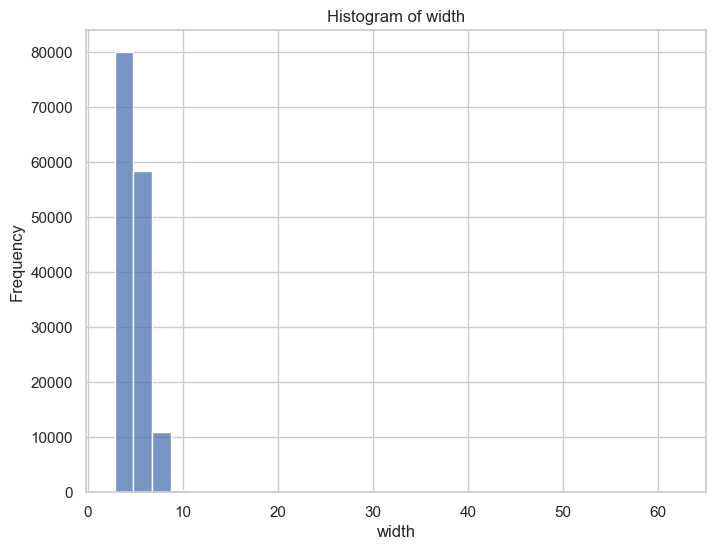

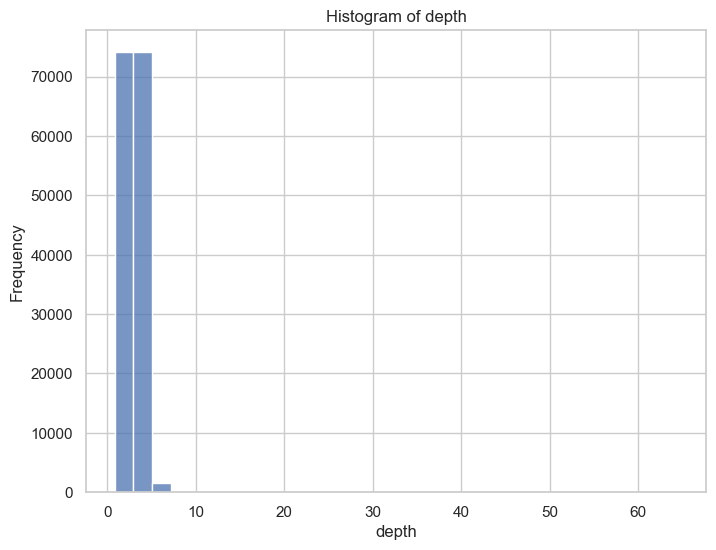

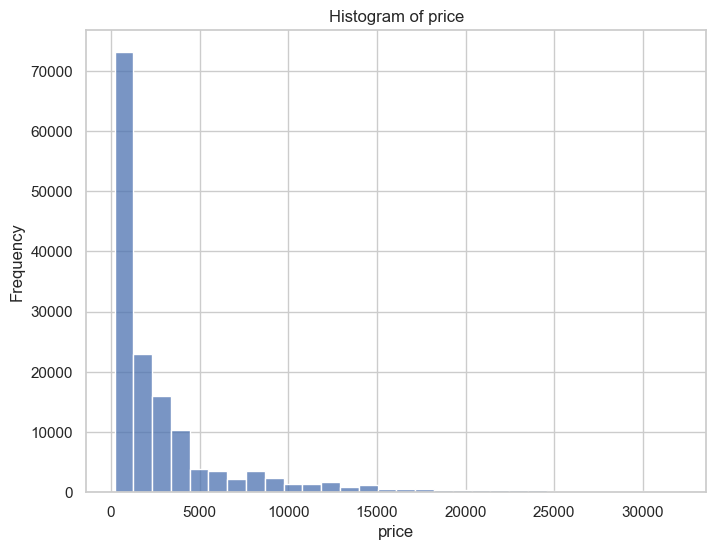

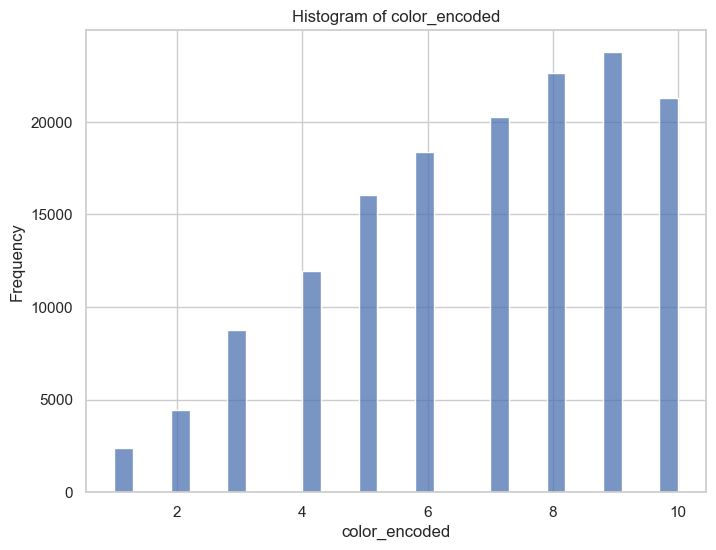

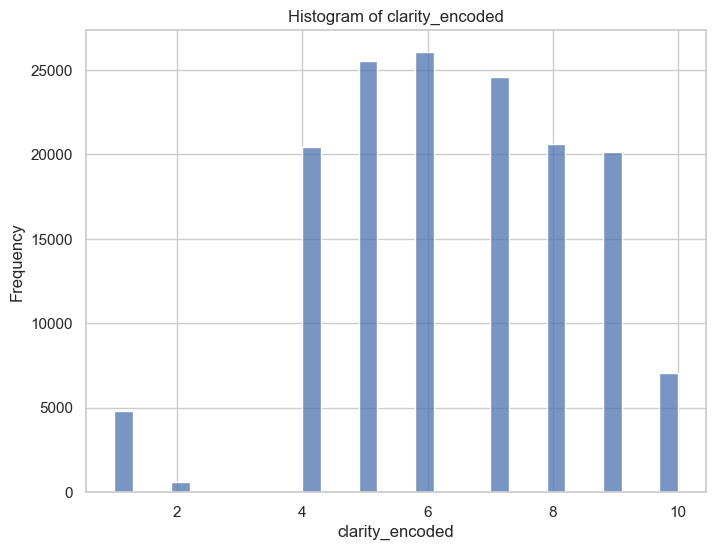

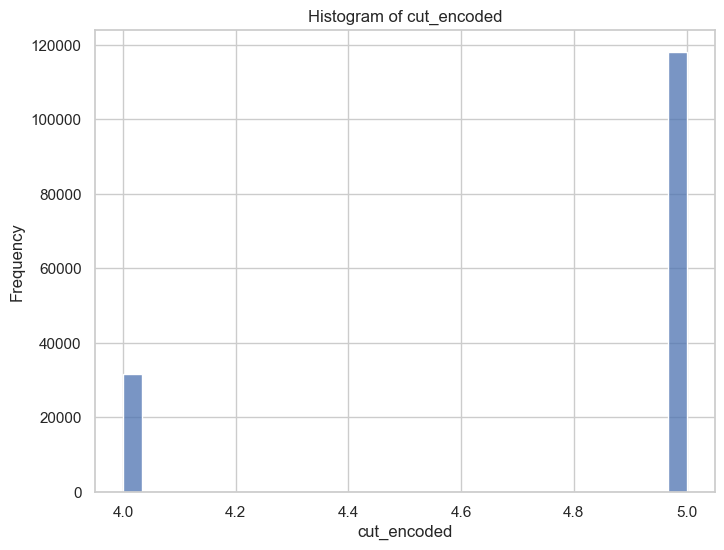

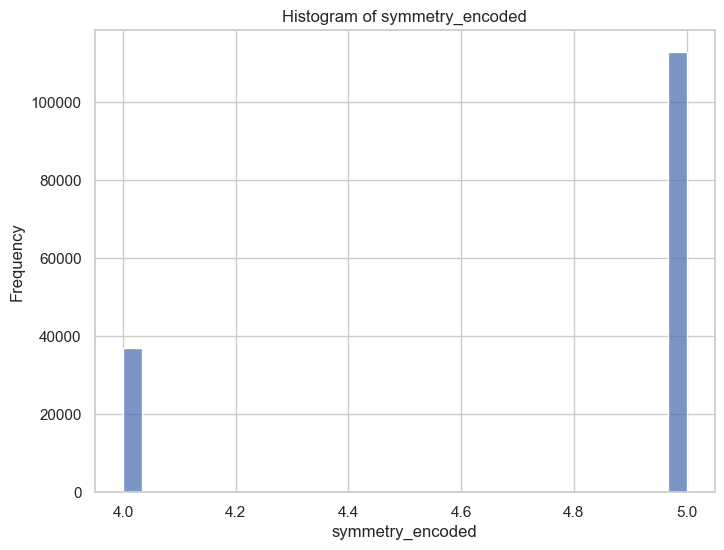

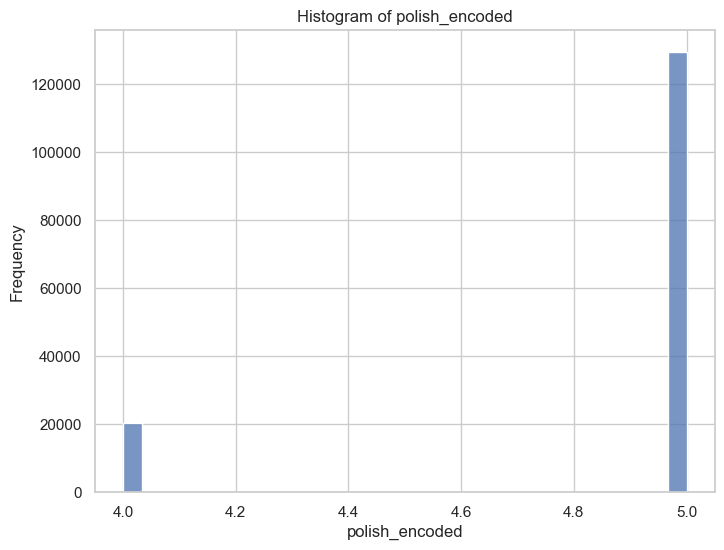

In [227]:
# List of numerical features
numerical_features = ['carat', 'depth_percent', 'table_percent', 'length', 'width', 'depth', 'price', 
                      'color_encoded', 'clarity_encoded', 'cut_encoded', 'symmetry_encoded', 'polish_encoded']

# Plot histograms for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(diamond_dataset[feature], bins = 30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Question 1.3

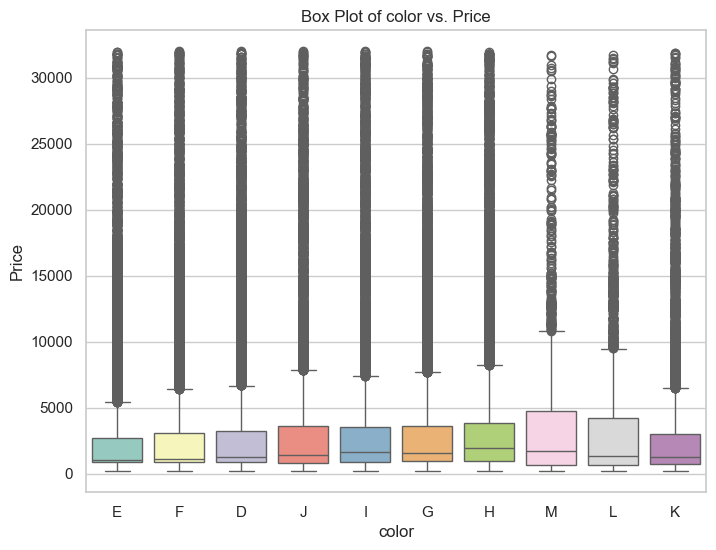

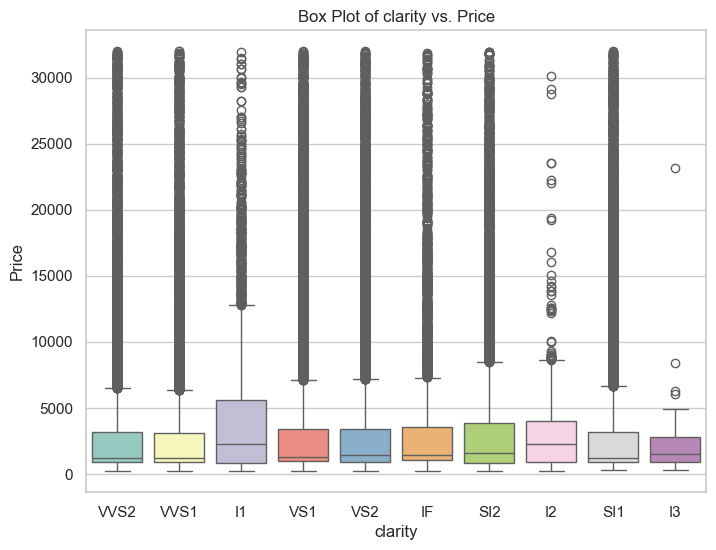

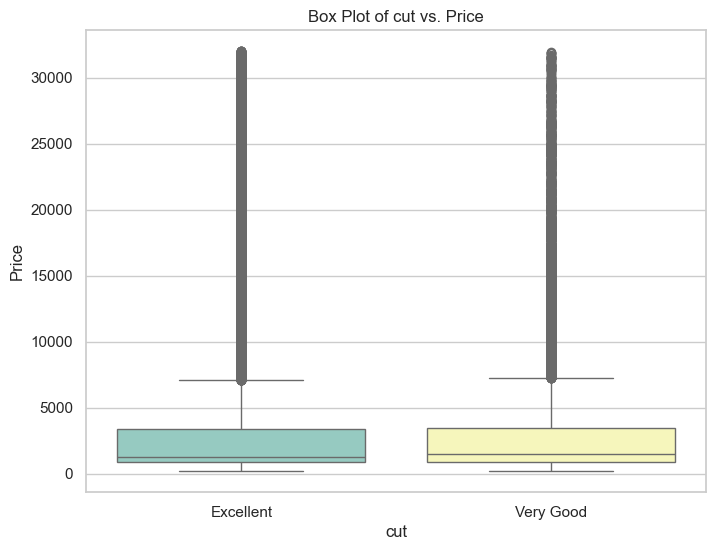

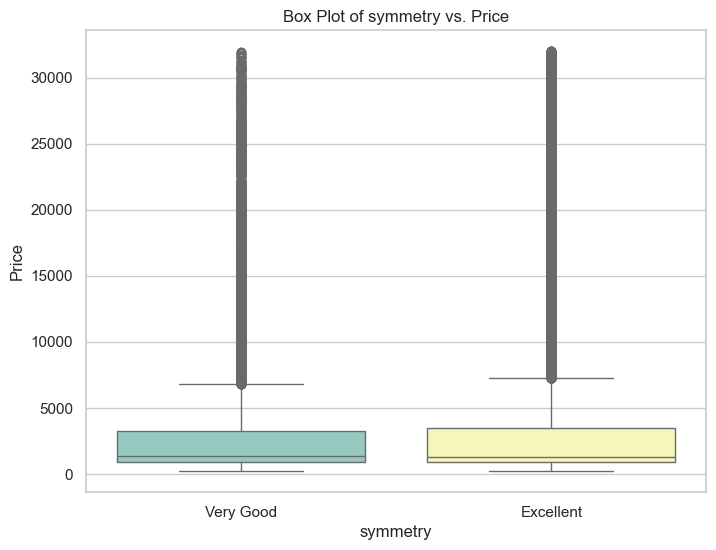

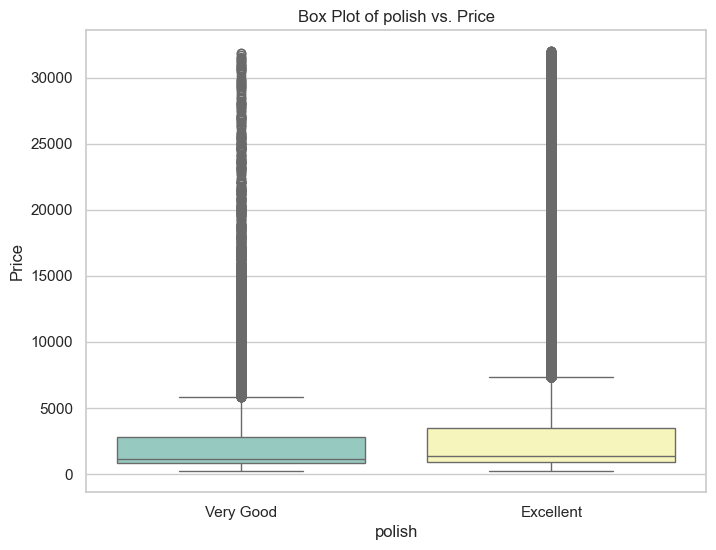

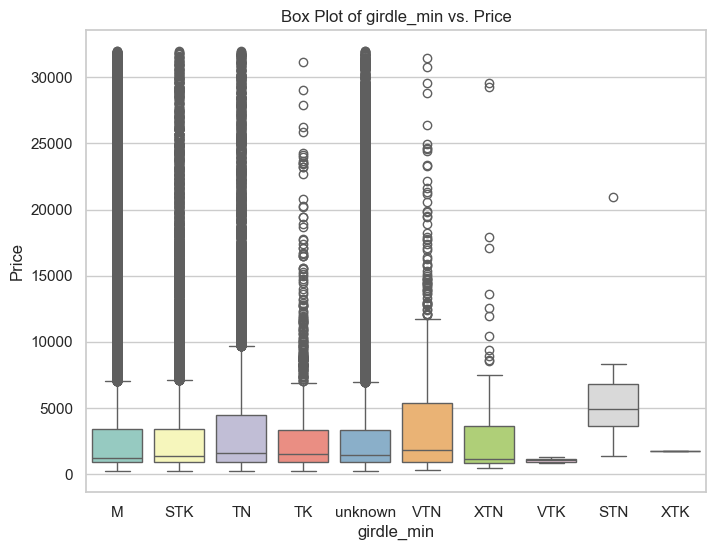

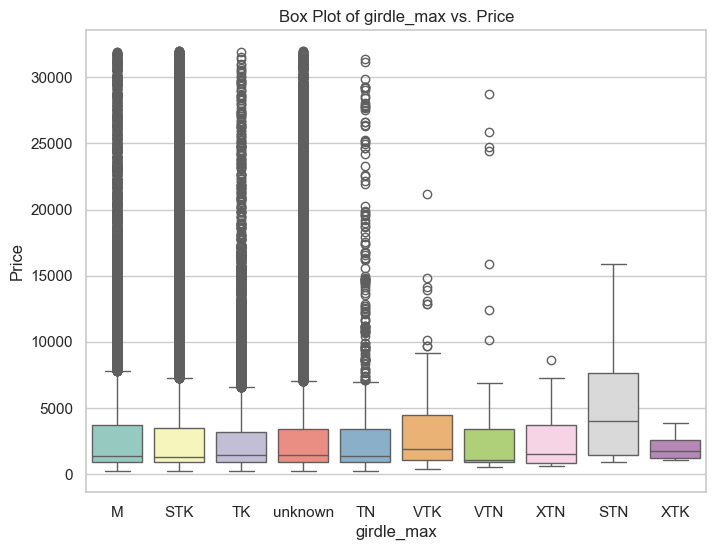

In [228]:
# List of categorical features
categorical_features = ['color', 'clarity', 'cut', 'symmetry', 'polish', 'girdle_min', 'girdle_max']

# Plot box plots for each categorical feature vs. target variable (price)
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x = feature, y = 'price', data = dataset_1, hue = feature, palette = 'Set3')
    plt.title(f'Box Plot of {feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

### Question 1.4

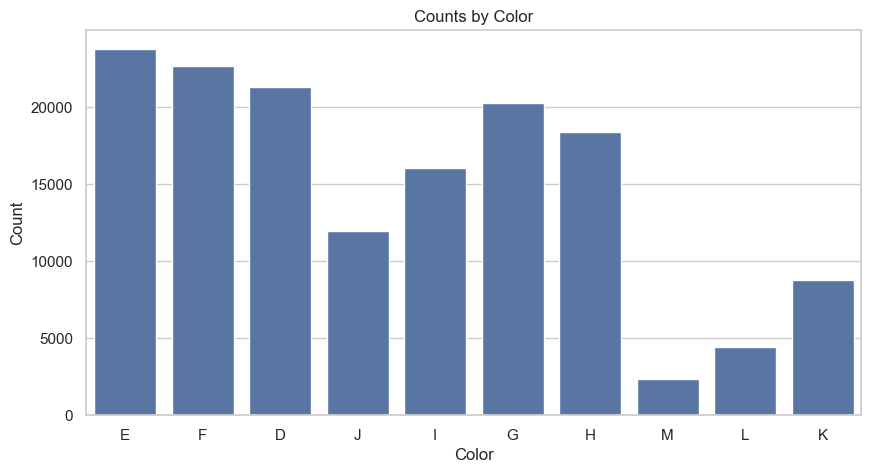

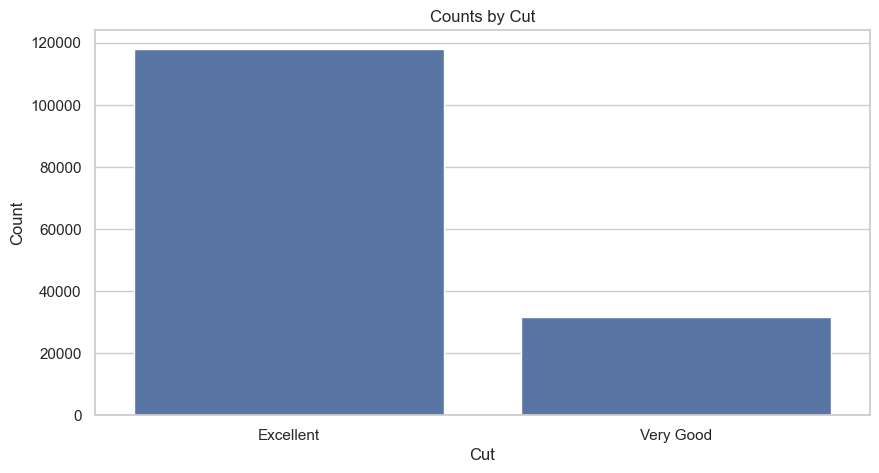

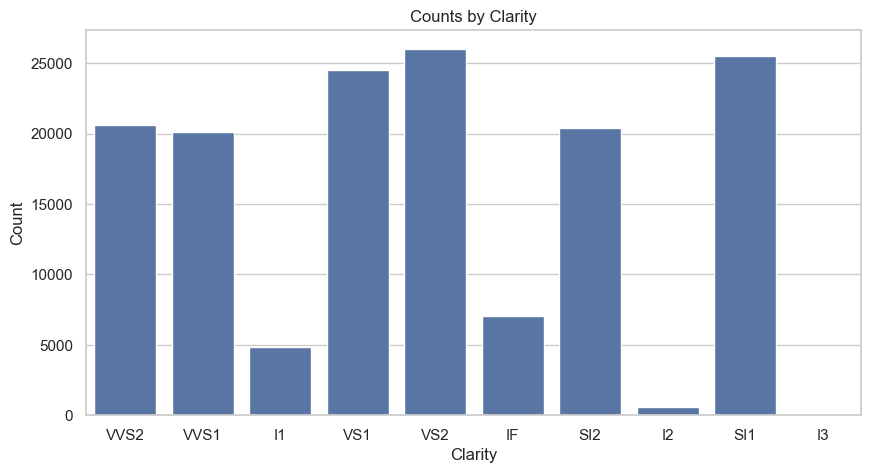

In [229]:
# Plot counts by color
plt.figure(figsize=(10, 5))
sns.countplot(x = 'color', data = dataset_1)
plt.title('Counts by Color') 
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

# Plot counts by cut
plt.figure(figsize=(10, 5))
sns.countplot(x = 'cut', data = dataset_1)
plt.title('Counts by Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

# Plot counts by clarity
plt.figure(figsize=(10, 5))
sns.countplot(x = 'clarity', data = dataset_1)
plt.title('Counts by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.show()

### Question 2.1

In [230]:
from sklearn.preprocessing import StandardScaler

# Extract numerical features to be standardized from the original dataset
numerical_features = diamond_dataset[['carat', 'depth_percent', 'table_percent', 'length', 'width', 'depth', 'price']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
standardized_features = scaler.fit_transform(numerical_features)

# Convert the standardized features back to a DataFrame
standardized_features_df = pd.DataFrame(standardized_features, columns = numerical_features.columns)

# Display the standardized features
print(standardized_features_df.head())


      carat  depth_percent  table_percent    length     width     depth  \
0 -1.157106       0.215866       0.345119 -2.146391 -2.078247 -0.730430   
1 -1.157106       0.014689       0.345119 -2.156289 -2.059209 -0.735681   
2 -1.157106      -0.186488       0.345119 -2.116697 -2.049690 -0.740932   
3 -1.157106       0.039836       0.345119 -2.136493 -2.068728 -0.735681   
4 -1.157106       0.769101       0.218693 -2.205778 -2.116324 -0.714676   

      price  
0 -0.659094  
1 -0.659094  
2 -0.659094  
3 -0.659094  
4 -0.659094  


### Question 2.2

In [247]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = diamond_dataset.drop(columns = ['price'])  
y = diamond_dataset['price']               

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Let's print the shape of each set to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (119896, 11)
y_train shape: (119896,)
X_test shape: (29975, 11)
y_test shape: (29975,)


In [248]:
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information between features and target variable
mi_scores = mutual_info_regression(X_train, y_train)

# Create a DataFrame to display feature names and their MI scores
mi_scores_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})

# Sort the DataFrame by MI score in ascending order
mi_scores_df = mi_scores_df.sort_values(by = 'MI Score', ascending = True)

# Display the two features with the lowest MI (Mutual Information) scores
print("Features with lowest MI scores:")
print(mi_scores_df.head(2))

Features with lowest MI scores:
           Feature  MI Score
10  polish_encoded  0.012718
2    table_percent  0.024727


In [249]:
# Find top 5 MI Score features for feature selection 

# Sort the DataFrame by MI score in descending order
mi_scores_df = mi_scores_df.sort_values(by = 'MI Score', ascending = False)

# Display the two features with the lowest MI (Mutual Information) scores
print("Features with lowest MI scores:")
print(mi_scores_df.head(11))

Features with lowest MI scores:
             Feature  MI Score
0              carat  1.358837
4              width  1.192427
3             length  1.184966
5              depth  1.149763
6      color_encoded  0.177956
7    clarity_encoded  0.163771
1      depth_percent  0.039978
9   symmetry_encoded  0.025916
8        cut_encoded  0.025621
2      table_percent  0.024727
10    polish_encoded  0.012718


In [250]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression, f_regression

# Use mutual_info_regression and f_regression to verify top 5 features for feature selection

# Number of features to select
k = 5  

# Select features using mutual info regression
selector_mi = SelectKBest(score_func = mutual_info_regression, k = k)
X_train_mi = selector_mi.fit_transform(X_train, y_train)
selected_features_mi = X_train.columns[selector_mi.get_support()]

# Select features using f regression
selector_f = SelectKBest(score_func = f_regression, k = k)
X_train_f = selector_f.fit_transform(X_train, y_train)
selected_features_f = X_train.columns[selector_f.get_support()]

# Print selected features
print("Selected features using Mutual Information Regression:", selected_features_mi)
print("Selected features using F Regression:", selected_features_f)

Selected features using Mutual Information Regression: Index(['carat', 'length', 'width', 'depth', 'color_encoded'], dtype='object')
Selected features using F Regression: Index(['carat', 'length', 'width', 'depth', 'polish_encoded'], dtype='object')


In [255]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

# Test RMSE based on full dataset

# Split the dataset into features (X) and target variable (y)
X = diamond_dataset.drop(columns = ['price'])  
y = diamond_dataset['price']               

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train regression model using all features
model_all_features = LinearRegression()
model_all_features.fit(X_train, y_train)

# Predict on test set using all features
y_pred_all_features = model_all_features.predict(X_test)

# Calculate test RMSE using all features
rmse_all_features = sqrt(mean_squared_error(y_test, y_pred_all_features))

# Compare test RMSE values
print("Test RMSE with all features:", rmse_all_features)

Test RMSE with all features: 1597.6635019552236


In [256]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# Select the subset of features
selected_features = ['carat', 'width', 'length', 'depth', 'color_encoded', 'clarity_encoded']

# Split the dataset into features (X) and target variable (y) using the selected columns
X = diamond_dataset[selected_features]
y = diamond_dataset['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train regression model using selected features
model_selected_features = LinearRegression()
model_selected_features.fit(X_train_selected, y_train)

# Predict on test set using selected features
y_pred_selected_features = model_selected_features.predict(X_test_selected)

# Calculate test RMSE using selected features
rmse_selected_features = sqrt(mean_squared_error(y_test, y_pred_selected_features))

# Print test RMSE with selected features
print("Test RMSE with selected features:", rmse_selected_features)


Test RMSE with selected features: 1605.9022057533411


### Question 4.0

### OLS Regression

In [284]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

# Split the dataset into features (X) and target variable (y)
X = diamond_dataset.drop(columns = ['price'])  
y = diamond_dataset['price']               

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Instantiate the OLS regression model
ols_model = LinearRegression()

# Perform 10-fold cross-validation for OLS regression
ols_rmse_scores = np.sqrt(-cross_val_score(ols_model, X_train, y_train,
                                           cv = 10, scoring = 'neg_mean_squared_error'))

# Calculate average RMSE for training sets
average_ols_rmse_train = np.mean(ols_rmse_scores)

# Fit the model to the entire training data
ols_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = ols_model.predict(X_test)

# Calculate RMSE for the test set
ols_rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))

# Print average RMSE scores for training and test sets
print("Average RMSE for OLS (Training):", average_ols_rmse_train)
print("RMSE for OLS (Test):", ols_rmse_test)

Average RMSE for OLS (Training): 1603.8680144990565
RMSE for OLS (Test): 1597.6635019552236


### Lasso Regression

In [277]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso

# Split the dataset into features (X) and target variable (y)
X = diamond_dataset.drop(columns = ['price'])  
y = diamond_dataset['price']               

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Instantiate the Lasso regression model
lasso_model = Lasso(alpha = 0.1)  

# Perform 10-fold cross-validation for Lasso regression
lasso_rmse_scores = np.sqrt(-cross_val_score(lasso_model, X_train, y_train,
                                             cv = 10, scoring = 'neg_mean_squared_error'))

# Calculate average RMSE for training sets
average_lasso_rmse_train = np.mean(lasso_rmse_scores)

# Fit the model to the entire training data
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = lasso_model.predict(X_test)

# Calculate RMSE for the test set
lasso_rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))

# Print average RMSE scores for training and test sets
print("Average RMSE for Lasso (Training):", average_lasso_rmse_train)
print("RMSE for Lasso (Test):", lasso_rmse_test)

Average RMSE for Lasso (Training): 1603.861158277167
RMSE for Lasso (Test): 1597.6672327627987


### Ridge Regression

In [268]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Ridge

# Split the dataset into features (X) and target variable (y)
X = diamond_dataset.drop(columns = ['price'])  
y = diamond_dataset['price']               

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Instantiate the Ridge regression model
ridge_model = Ridge(alpha = 1.0)  

# Perform 10-fold cross-validation for Ridge regression
ridge_rmse_scores = np.sqrt(-cross_val_score(ridge_model, X_train, y_train,
                                             cv = 10, scoring = 'neg_mean_squared_error'))

# Calculate average RMSE for training sets
average_ridge_rmse_train = np.mean(ridge_rmse_scores)

# Fit the model to the entire training data
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = ridge_model.predict(X_test)

# Calculate RMSE for the test set
ridge_rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))

# Print average RMSE scores for training and test sets
print("Average RMSE for Ridge (Training):", average_ridge_rmse_train)
print("RMSE for Ridge (Test):", ridge_rmse_test)


Average RMSE for Ridge (Training): 1603.867960274192
RMSE for Ridge (Test): 1597.6673645823319


### Question 4.1

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into features (X) and target variable (y)
X = diamond_dataset.drop(columns=['price'])
y = diamond_dataset['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ordinary Least Squares (OLS) regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Train Lasso regression
lasso_model = Lasso(alpha = 0.1)  # Alpha value pulled from following code 
lasso_model.fit(X_train, y_train)

# Train Ridge regression
ridge_model = Ridge(alpha = 1.0) # Alpha value pulled from following code
ridge_model.fit(X_train, y_train)

# Predictions
ols_pred = ols_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

# Compute MSE scores
ols_mse = mean_squared_error(y_test, ols_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

# Print coefficients
print("OLS Coefficients:", ols_model.coef_)
print("Lasso Coefficients:", lasso_model.coef_)
print("Ridge Coefficients:", ridge_model.coef_)

# Print MSE scores
print("MSE for OLS:", ols_mse)
print("MSE for Lasso:", lasso_mse)
print("MSE for Ridge:", ridge_mse)

OLS Coefficients: [ 1.39241999e+04 -3.49134385e+01  2.64082430e+01 -9.61944482e+02
 -4.13085910e+01 -1.31068866e+01  3.35974312e+02  2.93824841e+02
  2.26479902e+02  6.79618721e+01  1.93267729e+01]
Lasso Coefficients: [ 1.39077722e+04 -3.48511529e+01  2.63474343e+01 -9.55589036e+02
 -4.11692196e+01 -1.31139708e+01  3.35995031e+02  2.93913084e+02
  2.25996797e+02  6.76944618e+01  1.86494929e+01]
Ridge Coefficients: [ 1.39105526e+04 -3.48744229e+01  2.63742948e+01 -9.56606945e+02
 -4.13283554e+01 -1.31186135e+01  3.35994463e+02  2.93888710e+02
  2.26322258e+02  6.79047140e+01  1.93316628e+01]
MSE for OLS: 2552528.665479829
MSE for Lasso: 2552540.586643939
MSE for Ridge: 2552541.0078514535


### Question 4.2

In [276]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the range of alpha values to search
alphas = [0.1, 1.0, 10.0]

# Create Lasso regression model
lasso_model = Lasso()

# Define grid search parameters
param_grid = {'alpha': alphas}

# Perform grid search cross-validation
grid_search = GridSearchCV(lasso_model, param_grid, cv = 10,
                           scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_lasso_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Report the best regularization scheme and optimal penalty parameter
print("Best Regularization Scheme: Lasso Regression")
print("Optimal Penalty Parameter (alpha):", best_alpha)


Best Regularization Scheme: Lasso Regression
Optimal Penalty Parameter (alpha): 0.1


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the range of alpha values to search
alphas = [0.1, 1.0, 10.0]

# Create Ridge regression model
ridge_model = Ridge()

# Define grid search parameters
param_grid = {'alpha': alphas}

# Perform grid search cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, cv = 10,
                           scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Report the best regularization scheme and optimal penalty parameter
print("Best Regularization Scheme: Ridge Regression")
print("Optimal Penalty Parameter (alpha):", best_alpha)


Best Regularization Scheme: Ridge Regression
Optimal Penalty Parameter (alpha): 1.0


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

# Define the range of alpha values to search
lasso_alphas = [0.1, 1.0, 10.0]
ridge_alphas = [0.1, 1.0, 10.0]

best_score = float("-inf")
best_model = None
best_alpha = None
best_reg = None

# Iterate through regularization schemes and alpha values
for alpha in lasso_alphas:
    lasso_model = Lasso(alpha=alpha)
    param_grid = {'alpha': [alpha]}
    grid_search = GridSearchCV(lasso_model, param_grid, cv=10, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_alpha = grid_search.best_params_['alpha']
        best_reg = "Lasso"

for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    param_grid = {'alpha': [alpha]}
    grid_search = GridSearchCV(ridge_model, param_grid, cv=10, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_alpha = grid_search.best_params_['alpha']
        best_reg = "Ridge"

# Report the best regularization scheme and optimal penalty parameter
print("Best Regularization Scheme:", best_reg)
print("Optimal Penalty Parameter (alpha):", best_alpha)
print("Best MSE:", -best_score)  # Convert back from negated MSE to MSE

Best Regularization Scheme: Lasso
Optimal Penalty Parameter (alpha): 0.1
Best MSE: 2573736.428230634


### Question 4.3

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Split the dataset into features (X) and target variable (y)
X = diamond_dataset.drop(columns = ['price'])  
y = diamond_dataset['price']               

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Instantiate Ridge regression models with and without feature standardization
ridge_model_standardized = Ridge(alpha = 1.0)
ridge_model_unstandardized = Ridge(alpha = 1.0)

# Standardize features (fit on training data and transform both training and test data)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Train Ridge regression models (Standardized and Unstandardized)
ridge_model_standardized.fit(X_train_standardized, y_train)
ridge_model_unstandardized.fit(X_train, y_train)  

# Predict on test set
y_pred_standardized = ridge_model_standardized.predict(X_test_standardized)
y_pred_unstandardized = ridge_model_unstandardized.predict(X_test)

# Calculate MSE for both standardized and unstandardized predictions
mse_standardized = mean_squared_error(y_test, y_pred_standardized)
mse_unstandardized = mean_squared_error(y_test, y_pred_unstandardized)

# Convert MSE to RMSE
rmse_standardized = np.sqrt(mse_standardized)
rmse_unstandardized = np.sqrt(mse_unstandardized)

# Print RMSE values
print("Root Mean Squared Error (Standardized Features):", rmse_standardized)
print("Root Mean Squared Error (Unstandardized Features):", rmse_unstandardized)

Root Mean Squared Error (Standardized Features): 1597.664245627632
Root Mean Squared Error (Unstandardized Features): 1597.6673645823319


### Question 4.4

In [288]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import statsmodels.api as sm

# Split the dataset into features (X) and target variable (y)
X = diamond_dataset.drop(columns=['price'])  
y = diamond_dataset['price']               

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ordinary Least Squares (OLS) Regression
ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print("OLS Regression Summary:")
print(ols_model.summary())

OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                 8.313e+04
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        15:15:00   Log-Likelihood:            -1.0550e+06
No. Observations:              119896   AIC:                         2.110e+06
Df Residuals:                  119884   BIC:                         2.110e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const           

### Question 5.1 & Question 5.2

In [20]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Select features (replace 'selected_features' with your selected features)
selected_features = ['carat', 'width', 'length', 'depth', 'color_encoded', 'clarity_encoded']

# Extract selected features
X = diamond_dataset[selected_features]
y = diamond_dataset['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial regression with Ridge regularization
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=6)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define hyperparameters to search for optimal alpha value
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best Ridge model from grid search
best_ridge_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (Polynomial Ridge Regression):", rmse)
print("Best alpha value:", best_ridge_model.named_steps['ridge'].alpha)


Root Mean Squared Error (Polynomial Ridge Regression): 992.2705854457803
Best alpha value: 100


In [20]:
from sklearn.model_selection import GridSearchCV

# Select features (replace 'selected_features' with your selected features)
selected_features = ['carat', 'width', 'length', 'depth', 'color_encoded', 'clarity_encoded']

# Assuming X and y are your selected features and target variable
X = diamond_dataset[selected_features]
y = diamond_dataset['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the maximum degree for polynomial features
max_degree = 6

# Define the pipeline with polynomial feature transformation and ridge regression
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scale', StandardScaler()),
    ('ridge', Ridge())
])

# Define the hyperparameter grid for tuning
param_grid = {
    'poly__degree': [2, 3, 4, 5, 6],  # Try different polynomial degrees
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]  # Try different values of alpha for ridge regularization
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (Best Model):', rmse)
print('Best Hyperparameters:', best_params)


Root Mean Squared Error (Best Model): 774.5707742669373
Best Hyperparameters: {'poly__degree': 5, 'ridge__alpha': 100.0}


In [24]:
# Get the coefficients of the ridge regression model
coefficients = best_model.named_steps['ridge'].coef_

# Pair the coefficients with the original feature names
feature_coef_pairs = list(zip(X.columns, coefficients))

# Sort the features based on the absolute magnitude of coefficients
sorted_features = sorted(feature_coef_pairs, key=lambda x: abs(x[1]), reverse=True)

# Extract the names of the most salient individual features
most_salient_features = [(feature, coef) for feature, coef in sorted_features[:5]]

print('Top 5 Most Salient Individual Features:')
for feature, coef in most_salient_features:
    print('Feature: {}, Coefficient: {:.4f}'.format(feature, coef))

Top 5 Most Salient Individual Features:
Feature: length, Coefficient: 302.1946
Feature: width, Coefficient: 288.0446
Feature: color_encoded, Coefficient: 161.9015
Feature: clarity_encoded, Coefficient: 107.6702
Feature: depth, Coefficient: 4.4897


In [25]:
# Specify the polynomial degrees to consider
degrees = [2, 3, 4, 5, 6]

# Iterate over each polynomial degree
for degree in degrees:
    print('Salient Features for Polynomial Degree {}:'.format(degree))
    
    # Fit a new polynomial regression model with the specified degree
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('scale', StandardScaler()),
        ('ridge', Ridge(alpha=1.0))
    ])
    model.fit(X_train, y_train)
    
    # Get the coefficients of the ridge regression model
    coefficients = model.named_steps['ridge'].coef_
    
    # Pair the coefficients with the original feature names
    feature_coef_pairs = list(zip(X.columns, coefficients))
    
    # Sort the features based on the absolute magnitude of coefficients
    sorted_features = sorted(feature_coef_pairs, key=lambda x: abs(x[1]), reverse=True)
    
    # Extract the names of the most salient individual features
    most_salient_features = [(feature, coef) for feature, coef in sorted_features[:5]]
    
    # Print the salient features and their coefficients
    for feature, coef in most_salient_features:
        print('Feature: {}, Coefficient: {:.4f}'.format(feature, coef))
    
    print() # blank line for separation


Salient Features for Polynomial Degree 2:
Feature: width, Coefficient: -14006.4285
Feature: length, Coefficient: 2607.6534
Feature: depth, Coefficient: 1773.2032
Feature: clarity_encoded, Coefficient: 1284.4771
Feature: color_encoded, Coefficient: -293.7092

Salient Features for Polynomial Degree 3:
Feature: length, Coefficient: 5394.4397
Feature: color_encoded, Coefficient: 2567.9505
Feature: depth, Coefficient: 1827.5702
Feature: clarity_encoded, Coefficient: 1161.0485
Feature: width, Coefficient: 729.4969

Salient Features for Polynomial Degree 4:
Feature: width, Coefficient: 3418.0744
Feature: depth, Coefficient: -1539.5500
Feature: length, Coefficient: 1093.9694
Feature: clarity_encoded, Coefficient: -1032.1956
Feature: color_encoded, Coefficient: -561.4934

Salient Features for Polynomial Degree 5:
Feature: depth, Coefficient: -2718.6614
Feature: width, Coefficient: 2664.9906
Feature: clarity_encoded, Coefficient: -1546.8376
Feature: color_encoded, Coefficient: -945.5040
Feature:

### Question 6.1

In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Split the dataset into features (X) and target variable (y)
X = diamond_dataset.drop(columns=['price'])  
y = diamond_dataset['price']               

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(randint.rvs(10, 100),) for _ in range(10)],  # Varying hidden layer sizes
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Weight decay for regularization
    'activation': ['logistic', 'tanh', 'relu']
}

# Create a MLPRegressor model
mlp = MLPRegressor(random_state=42, max_iter=1000)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=20,
                                   cv=5, n_jobs=-1, verbose=1,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best hyperparameters and RMSE
print('Best Hyperparameters:', best_params)
print('Mean Squared Error (Best Model):', -random_search.best_score_)




Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_m

Best Hyperparameters: {'hidden_layer_sizes': (93,), 'alpha': 0.01, 'activation': 'tanh'}
Mean Squared Error (Best Model): 494544.21868331823


In [18]:
import numpy as np

mse = 494544.21 # From previous step

# Calculate RMSE
rmse = np.sqrt(mse)

print('Root Mean Squared Error (Best Model):', rmse)

Root Mean Squared Error (Best Model): 703.2383735263599


### Question 7.1

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features (replace 'selected_features' with your selected features)
selected_features = ['carat', 'width', 'length', 'depth', 'color_encoded', 'clarity_encoded']

# Assuming X and y are your selected features and target variable
X = diamond_dataset[selected_features]
y = diamond_dataset['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_features': [None, 'sqrt', 'log2'],  # Maximum number of features to consider for splitting
    'n_estimators': [50, 100, 150],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]            # Maximum depth of each tree
}

# Create a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_rmse = mean_squared_error(y_test, best_model.predict(X_test), squared=False)

# Print the best hyperparameters and test RMSE
print('Best Hyperparameters:', best_params)
print('Test RMSE (Best Model):', test_rmse)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'n_estimators': 100}
Test RMSE (Best Model): 651.2700226170989


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Question 7.3

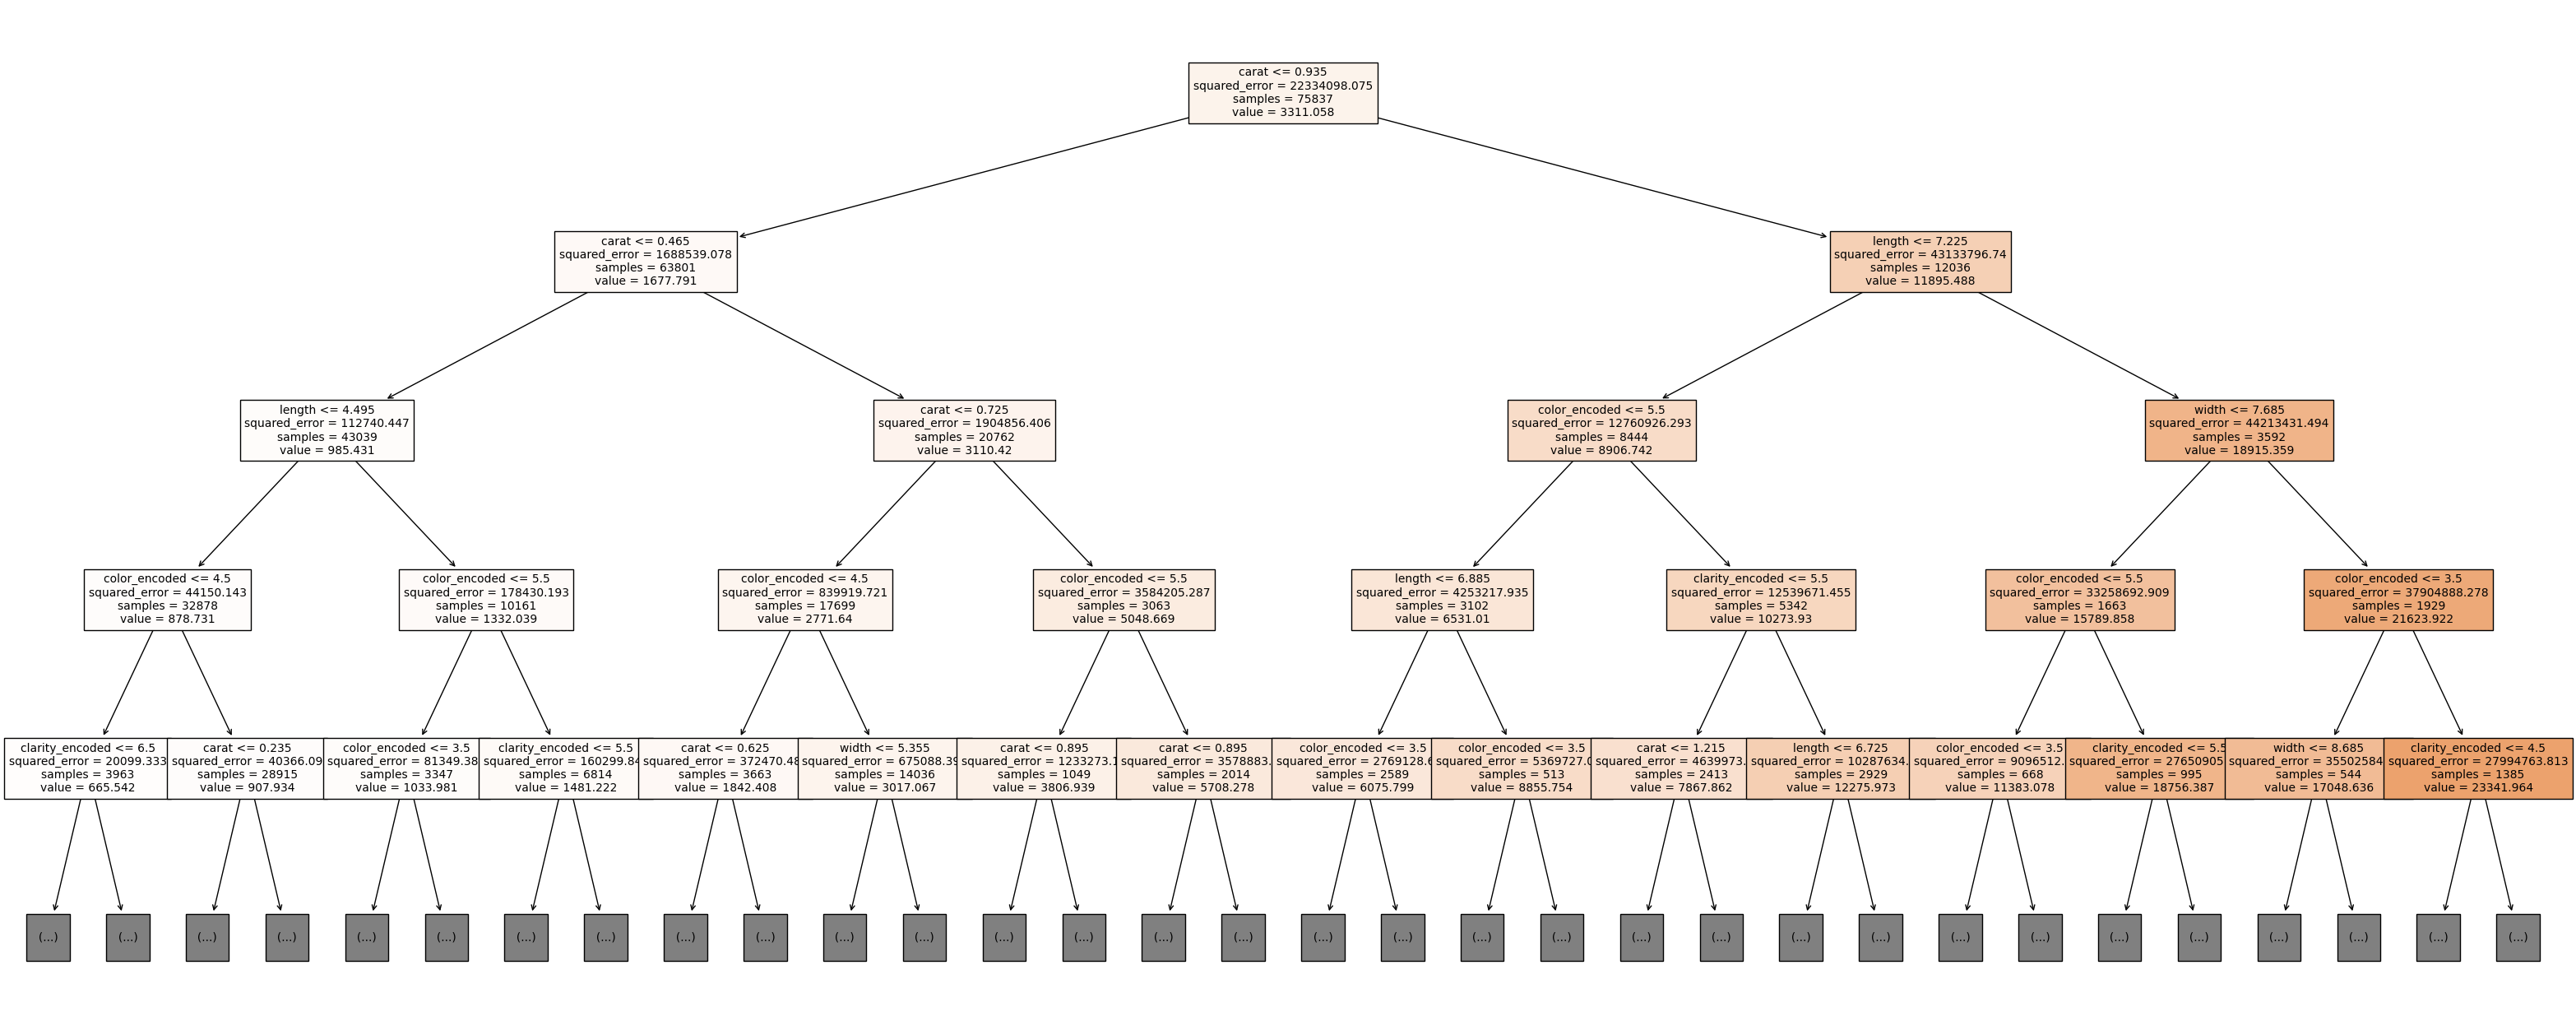

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get one of the trees from the Random Forest model
random_tree_index = 0  # Change this index to pick a different tree
random_tree = best_model.estimators_[random_tree_index]

# Plot the selected tree with larger font and box sizes
plt.figure(figsize=(40, 16))
plot_tree(random_tree, max_depth=4, filled=True, feature_names=X.columns, fontsize=10)
plt.show()



In [40]:
# Get feature importances from the Random Forest model
feature_importances = best_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

           Feature  Importance
0            carat    0.499863
2           length    0.219717
1            width    0.171990
4    color_encoded    0.062456
5  clarity_encoded    0.044062
3            depth    0.001911


### Question 7.4

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Get the Out-of-Bag (OOB) error
oob_error = 1 - rf.oob_score_

print('RMSE:', rmse)
print("R^2 Score:", r2)
print("Out-of-Bag (OOB) Error:", oob_error)

RMSE: 663.4613901504799
R^2 Score: 0.9801331852602833
Out-of-Bag (OOB) Error: 0.020482279829516226


### Question 8.1

In [23]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to optimize LightGBM hyperparameters
def lgb_optimization(num_leaves, learning_rate, max_depth, min_child_samples, reg_alpha, reg_lambda):
    # Define LightGBM parameters
    params = {
        'objective': 'regression',
        'metric': 'mse',
        'num_leaves': int(num_leaves),
        'learning_rate': learning_rate,
        'max_depth': int(max_depth),
        'min_child_samples': int(min_child_samples),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda
    }
    
    # Create LightGBM dataset
    train_data = lgb.Dataset(X_train, label=y_train)
    
    # Train LightGBM model
    gbm = lgb.train(params, train_data)
    
    # Make predictions on the test set
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    
    # Calculate Root Mean Squared Error (RMSE)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return -rmse  # Return negative RMSE since BayesianOptimization maximizes the objective function

# Define search space for hyperparameters
param_space = {
    'num_leaves': (10, 50),                  # Number of leaves in each tree
    'learning_rate': (0.01, 0.1),             # Learning rate
    'max_depth': (3, 10),                     # Maximum depth of each tree
    'min_child_samples': (20, 100),           # Minimum number of samples required to form a leaf node
    'reg_alpha': (0.1, 1.0),                  # L1 regularization term
    'reg_lambda': (0.1, 1.0)                  # L2 regularization term
}

# Initialize BayesianOptimization object
lgb_bayesian_opt = BayesSearchCV(
    lgb.LGBMRegressor(objective='regression', metric='mse'),
    param_space,
    n_iter=20,              # Adjust the number of iterations as needed
    cv=5,                   # Number of cross-validation folds
    n_jobs=-1,              # Use all available cores
    scoring='neg_root_mean_squared_error',  # Use RMSE as scoring metric
    random_state=42
)

# Perform Bayesian Optimization
lgb_bayesian_opt.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", lgb_bayesian_opt.best_params_)

# Train the final LightGBM model with the best hyperparameters
params = {
    'objective': 'regression',
    'metric': 'mse',
    **lgb_bayesian_opt.best_params_
}
final_train_data = lgb.Dataset(X_train, label=y_train)
final_gbm = lgb.train(params, final_train_data)

# Make predictions on the test set using the final model
y_pred = final_gbm.predict(X_test, num_iteration=final_gbm.best_iteration)

# Calculate Root Mean Squared Error (RMSE) on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on Test Set:", rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003079 seconds.
You can set `force